In [174]:
# Import stuff
import os, sys
import xml.etree.ElementTree as ET
import cv2
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
import random

In [170]:
# Load data
path = "BCCD"

def get_images(folder):
    imgs = []
    for image_filename in tqdm(os.listdir(folder + "/JPEGImages")):
        img_file = cv2.imread(folder + "/JPEGImages/" + image_filename)
        if img_file is not None:
            img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
            img_arr = np.asarray(img_file)
            imgs.append(img_arr)
    imgs = np.asarray(imgs)
    return imgs

def get_annotations(folder):
    df = pd.DataFrame(columns=["image_name", "cell_type", "xmin", "xmax", "ymin", "ymax"])
    for xml_filename in tqdm(os.listdir(folder + "/Annotations")):
        xml_file = ET.parse(folder + "/Annotations/" + xml_filename)
        if xml_file is not None:
            root = xml_file.getroot()
            for child in root:
                if child.tag == "filename":
                    filename = child.text
                if child.tag == "size":
                    width = child[0]
                    height = child[1]
                if child.tag == "object":
                    cell_type = child[0].text
                    if cell_type != "WBC":
                        continue
                    bbox = child[4]
                    xmin, ymin, xmax, ymax = [child.text for child in bbox]
                    xmin, xmax = xmin / width, xmax / width
                    ymin, ymax = ymin / width, ymax / width
                    df.loc[int(filename[-7:-4])] = [filename, cell_type, xmin, ymin, xmax, ymax]
    labels = pd.read_csv(folder + "/labels.csv")
#     labels["Category"] = labels["Category"].str.split(",")
    df = df.join(labels.iloc[:, 2:]).sort_index()
    return df.loc[df["Category"].notnull()]
    

imgs = get_images(path)
df = get_annotations(path)
df = df.loc[~df['Category'].str.contains(",", na=False)]
df = df.loc[~df['Category'].str.contains("BASOPHIL", na=False)]
df





  0%|          | 0/364 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/misc/pilutil.py:480: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/misc/pilutil.py:483: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):



  2%|▏         | 9/364 [00:00<00:04, 85.75it/s]


  5%|▍         | 17/364 [00:00<00:04, 82.87it/s]


  7%|▋         | 26/364 [00:00<00:03, 84.56it/s]


 10%|▉         | 35/364 [00:00<00:03, 83.77it/s]


 12%|█▏        | 42/364 [00:00<00:04, 75.65it/s]


 13%|█▎        | 49/364 [00:00<00:04, 73.61it/s]


 16%|█▌        | 58

,image_name,cell_type,xmin,xmax,ymin,ymax,Category
0,BloodImage_00000.jpg,WBC,260,177,491,376,NEUTROPHIL
1,BloodImage_00001.jpg,WBC,68,315,286,480,NEUTROPHIL
2,BloodImage_00002.jpg,WBC,283,1,567,106,NEUTROPHIL
3,BloodImage_00003.jpg,WBC,127,40,344,226,NEUTROPHIL
4,BloodImage_00004.jpg,WBC,109,134,324,321,NEUTROPHIL
5,BloodImage_00005.jpg,WBC,230,288,441,480,NEUTROPHIL
6,BloodImage_00006.jpg,WBC,117,190,290,360,NEUTROPHIL
7,BloodImage_00007.jpg,WBC,193,92,387,285,NEUTROPHIL
9,BloodImage_00009.jpg,WBC,23,137,255,423,EOSINOPHIL
11,BloodImage_00011.jpg,WBC,109,119,304,332,NEUTROPHIL


In [167]:
##### Split data into training, validation, and test
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

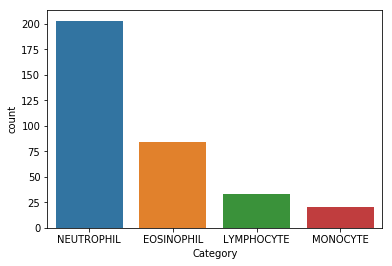

In [151]:
# Visualize data
sns.countplot(x="Category", data=df, order = df['Category'].value_counts().index)
plt.show()

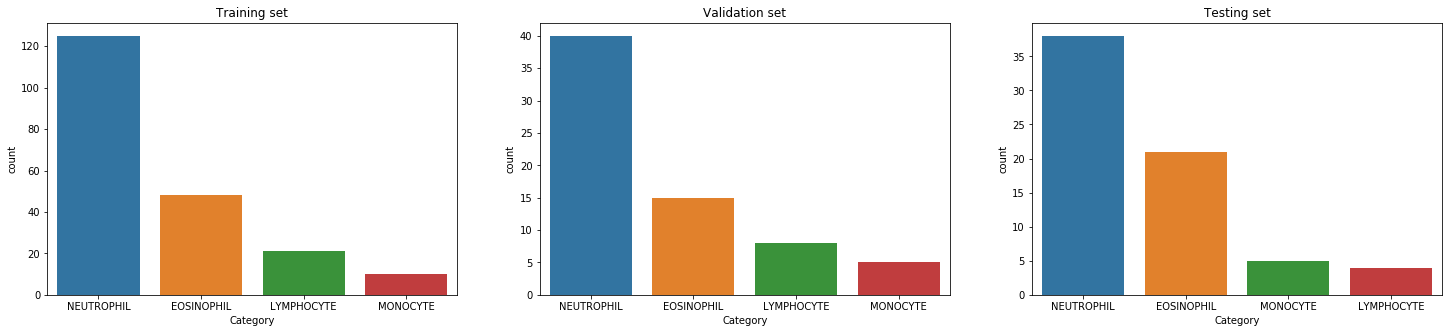

In [164]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.countplot(x="Category", data=train, order = train['Category'].value_counts().index)
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(x="Category", data=validate, order = validate['Category'].value_counts().index)
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(x="Category", data=test, order = test['Category'].value_counts().index)
plt.title("Testing set")
plt.show()

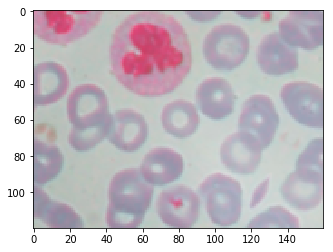

In [203]:
# Augment data
#     - Rotation
#     - Flipping
#     - Skewing
#     - Adding noise

def safe_rotate(img, bbox):
    # TODO
    pass
    
def flip(img, bbox):
    res = img
    if random.random() < 0.5:
        res = np.flipud(res)
        ymin, ymax = 1-ymin, 1-ymax
    if random.random() < 0.5:
        res = np.fliplr(res)
        xmin, xmax = 1-xmin, 1-xmax
    return res
    
def safe_skew(img, bbox):
    # TODO
    pass

def add_noise(img):
    # TODO
    pass

def lighting_condition(img):
    pass

def safe_translation(img, bbox):
    xmin, ymin, xmax, ymax = bbox
    x_trans_max = min(xmin, 1-xmax)
    y_trans_max = min(y_min, 1-ymax)
    pass

def safe_scaling(img):
    pass
    
def safe_augment(img, bbox):
    res = flip(img, bbox)
    res = safe_rotate(res, bbox)
    res = safe_skew(res, bbox)
    res = add_noise(res)
    return res

import skimage
rot = skimage.transform.rotate(imgs[1], angle=60, mode='reflect')
# from skimage import transform as tf
# import math
# tform = tf.AffineTransform(shear=0.5)

# rot = tf.warp(imgs[1], tform, mode='reflect')
# plt.subplot(2,1,1)
plt.imshow(rot)
# plt.subplot(2,1,2)
# plt.imshow(flip(rot))
plt.show()

In [ ]:
# Visualize augmented data

In [ ]:
# Build masic model

In [ ]:
# Train and evaluate basic model

In [ ]:
# Augment masic model and evaluate

In [ ]:
# ...

In [ ]:
# Present final model and run on test set